In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory

In [2]:
qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [3]:
qmf.get_client()

Job Limits:
╒══════════════╤═══════════════════╤═══════════════╕
│   Daily Used │   Daily Remaining │   Daily Limit │
╞══════════════╪═══════════════════╪═══════════════╡
│            0 │                10 │            10 │
╘══════════════╧═══════════════════╧═══════════════╛


In [52]:
barrier = qmf.create_barrier(
    positions=[0, 0],  # fine tune to split the cloud into roughly equal parts
    heights=[30, 30],
    widths=[5, 5],  # adjust as free parameter to optimize observed interference
    times=[2, 7]
)

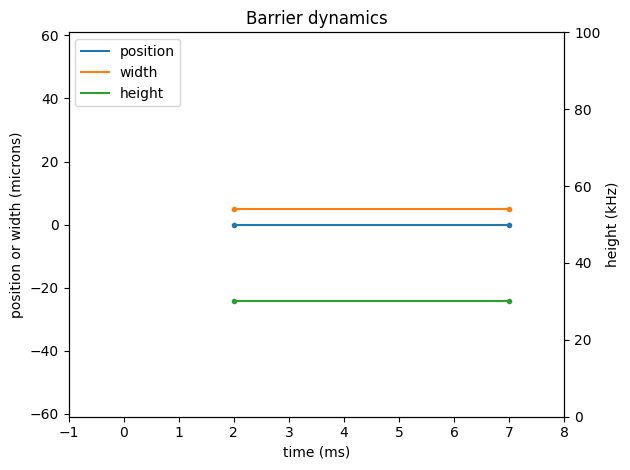

In [53]:
barrier.show_dynamics()

In [12]:
matter_in_trap = qmf.create_quantum_matter(
    temperature=50,  # another free parameter available for optimizing observed interference
    lifetime=1,
    image="TIME_OF_FLIGHT",
    name="Creating a BEC"
)

In [11]:
print(matter_in_trap)

name='Creating a BEC' temperature=50.0 lifetime=1 image=<ImageType.TIME_OF_FLIGHT: 'TIME_OF_FLIGHT'> time_of_flight=12 rf_evap=None rf_shield=None barriers=None landscape=None lasers=None note=None client=<oqtant.oqtant_client.OqtantClient object at 0x0000018E1C746710> result=None job_id=None output=None is_sim=False sim=None


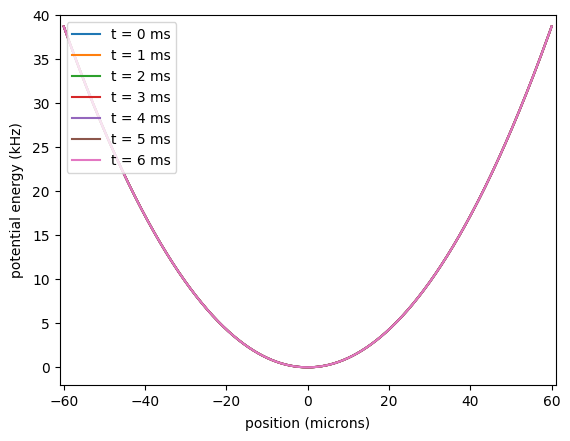

In [7]:
matter_in_trap.show_potential(times=[0, 1, 2, 3, 4, 5, 6], ylimits=[-2, 40])

In [13]:
#matter_in_trap.submit()

Submitting 1 job(s):

- Job: Creating a BEC
  Job ID: c365165f-68e7-4f01-b757-9baddc78e77f


In [14]:
tofs = [5, 7, 9, 11, 13]
tof_matters = []
for tof in tofs:
    tof_matters.append(
        qmf.create_quantum_matter(
            temperature=25,
            image="TIME_OF_FLIGHT",
            time_of_flight=tof,
            name="Shape Inversion w/ TOF = " + str(tof) + " ms",
        )
    )

In [15]:
# for matter in tof_matters:
#     matter.submit()

Submitting 1 job(s):

- Job: Shape Inversion w/ TOF = 5 ms
  Job ID: 1a3dc4e5-23ad-4fd8-82f8-0b9bfeb3cdd1
Submitting 1 job(s):

- Job: Shape Inversion w/ TOF = 7 ms
  Job ID: 99229436-2210-4a1f-a78f-445ee41755de
Submitting 1 job(s):

- Job: Shape Inversion w/ TOF = 9 ms
  Job ID: e72b9d50-6092-4fcd-88b9-8d09e77e4c30
Submitting 1 job(s):

- Job: Shape Inversion w/ TOF = 11 ms
  Job ID: 7aa8b4de-60cc-4690-ac25-3accb4d033a2
Submitting 1 job(s):

- Job: Shape Inversion w/ TOF = 13 ms
  Job ID: 0c745334-701f-47cf-803a-f7df65eca1f0


In [24]:
tof_matters[1].submit(sim=True)

submitted simulation


In [25]:
tof_matters[1].get_result()

ground state calculation in progress       
ground state calculation complete          
trapped simulation in progress             
trapped simulation complete                    
time-of-flight simulation in progress              
Condensate hit left boundary at time:   9.661448660122048
Condensate hit right boundary at time:   9.661448660122048


KeyboardInterrupt: 

In [ ]:
tof_matters[1].output.plot_tof(figsize=(6, 6))